In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from  sklearn.decomposition import TruncatedSVD
import warnings 
warnings.filterwarnings("ignore")
import csv

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.naive_bayes import MultinomialNB

In [3]:
data=[]
col_names=[]
with open('D:\\UIC\\Spring 2018\\text analysis\\Assignments\\2\\Tweets.csv',encoding="utf8",newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for itm,row in enumerate(spamreader):
        if itm==0:
            col_names.append(row)
        else:
            data.append(row)


In [4]:
print(col_names)
print(data[0])

[['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']]
['570306133677760513', 'neutral', '1.0', '', '', 'Virgin America', '', 'cairdin', '', '0', '@VirginAmerica What @dhepburn said.', '', '2015-02-24 11:35:52 -0800', '', 'Eastern Time (US & Canada)']


In [3]:
twitter_df = pd.DataFrame(data,columns=col_names[0])
twitter_df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,,,Virgin America,,cairdin,,0,@VirginAmerica What @dhepburn said.,,2015-02-24 11:35:52 -0800,,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,,0.0,Virgin America,,jnardino,,0,@VirginAmerica plus you've added commercials t...,,2015-02-24 11:15:59 -0800,,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,,,Virgin America,,yvonnalynn,,0,@VirginAmerica I didn't today... Must mean I n...,,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0,Bad Flight,0.7033,Virgin America,,jnardino,,0,@VirginAmerica it's really aggressive to blast...,,2015-02-24 11:15:36 -0800,,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0,Can't Tell,1.0,Virgin America,,jnardino,,0,@VirginAmerica and it's a really big bad thing...,,2015-02-24 11:14:45 -0800,,Pacific Time (US & Canada)


In [4]:
df=twitter_df[['airline','airline_sentiment','text']]
df.head(5)

,airline,airline_sentiment,text
0,Virgin America,neutral,@VirginAmerica What @dhepburn said.
1,Virgin America,positive,@VirginAmerica plus you've added commercials t...
2,Virgin America,neutral,@VirginAmerica I didn't today... Must mean I n...
3,Virgin America,negative,@VirginAmerica it's really aggressive to blast...
4,Virgin America,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
df_ = pd.DataFrame()
df_=df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count().reset_index(name='sentiment_counts')
df_.head(7)

In [ ]:
tuple(df_['airline'].unique())

In [ ]:
N = df['airline'].unique().shape[0]
positive = tuple(df_[df_['airline_sentiment'] == 'positive'].sentiment_counts)
negative= tuple(df_[df_['airline_sentiment'] == 'negative'].sentiment_counts)
neutral= tuple(df_[df_['airline_sentiment'] == 'neutral'].sentiment_counts)

ind = np.arange(N)  # the x locations for the groups
width = 0.20       # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind, positive, width, color='r')

rects2 = ax.bar(ind + width, negative, width, color='y')

rects3 = ax.bar(ind + width+width, neutral, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Sentiment Distribuion')
ax.set_title('Sentiment Distribuion by Airlines and Sentiments')
ax.set_xticks(ind + width+width / 3)
ax.set_xticklabels(tuple(df_['airline'].unique()))

ax.legend((rects1[0], rects2[0],rects3[0]), ('Positive', 'Negative','Neutral'))

plt.show()

In [6]:
df.shape

(14640, 3)

In [9]:
regexp_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
pattern_url = re.compile(regexp_url, re.UNICODE | re.IGNORECASE)

regexp_hashtag = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)'
pattern_hashtag = re.compile(regexp_hashtag, re.UNICODE | re.IGNORECASE)

regexp_mention = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)'
pattern_mention = re.compile(regexp_mention, re.UNICODE | re.IGNORECASE)


for idx,item in df.iterrows():
    tweet=item['text']
    #Removing urls
    tweet = pattern_url.sub('', tweet)
    #Removing mentions
    tweet = pattern_mention.sub('', tweet)
    #Chaning hashtag sign (#) to 'hashtag_'
    tweet = pattern_hashtag.sub(r'hashtag_\1', tweet)
    df.loc[idx,'text']=tweet
    

df.head(6)   


,airline,airline_sentiment,text
0,Virgin America,neutral,What said.
1,Virgin America,positive,plus you've added commercials to the experien...
2,Virgin America,neutral,I didn't today... Must mean I need to take an...
3,Virgin America,negative,"it's really aggressive to blast obnoxious ""en..."
4,Virgin America,negative,and it's a really big bad thing about it
5,Virgin America,negative,seriously would pay $30 a flight for seats th...


In [18]:
def count_vectorization(tweets):
    count = CountVectorizer(binary=False, stop_words = 'english')
    X = count.fit_transform(tweets)       # fit means data should be fitted into the model and immediatly transform
    return X

# vectorizing all the tweets

In [80]:
df_tweets=df['text']
print(type(df))
X=count_vectorization(df_tweets)
X1=X.toarray()
print(X1.shape)


<class 'pandas.core.frame.DataFrame'>
(14640, 13375)


# Q3

In [26]:
from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [42]:
X_df=pd.DataFrame(X1)
#X_df.head(2)
df_vec = pd.concat([df, X_df], axis=1, ignore_index=True)
df_vec.head(2)

,0,1,2,3,4,5,6,7,8,9,...,13368,13369,13370,13371,13372,13373,13374,13375,13376,13377
0,Virgin America,neutral,What said.,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Virgin America,positive,plus you've added commercials to the experien...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
from sklearn.metrics import accuracy_score 

airline= df['airline'].unique()
LR_airlines=pd.DataFrame(columns=('airline','accuracy','F-1_Score'))

for itx,item in enumerate(airline):
    validation_accuracy=[]
    f1score=[]
    airline_subset=df_vec[df_vec[0] == item]
    X=airline_subset.iloc[:,3:]
    X_1=X.as_matrix()
    y1=airline_subset.iloc[:,1]
    y=y1.as_matrix()
    kfold = KFold(10)
    for k,(train,test) in enumerate(kfold.split(X_1,y)):
        LR = LogisticRegression(C = .2)
        LR.fit(X_1[train], y[train])
        p_test = LR.predict(X_1[test])
        accu=accuracy_score(y[test], p_test)
        validation_accuracy.append(accu)
        f1=f1_score(y[test], p_test,average='weighted')
        f1score.append(f1)
        
    LR_airlines.loc[itx,'airline']=item
    print(item)    
    print("Accuracy: %0.2f" % (np.mean(validation_accuracy)))
    LR_airlines.loc[itx,'accuracy']=np.mean(validation_accuracy)
    print("F-1 Score: %0.2f" % (np.mean(f1score))) 
    LR_airlines.loc[itx,'F-1_Score']=np.mean(f1score)
    print('****')
 


Virgin America
Accuracy: 0.62
F-1 Score: 0.63
****
United
Accuracy: 0.75
F-1 Score: 0.70
****
Southwest
Accuracy: 0.70
F-1 Score: 0.70
****
Delta
Accuracy: 0.67
F-1 Score: 0.67
****
US Airways
Accuracy: 0.81
F-1 Score: 0.75
****
American
Accuracy: 0.77
F-1 Score: 0.71
****


In [133]:
print(LR_airlines)

          airline  accuracy F-1_Score
0  Virgin America  0.621137  0.627613
1          United  0.749602  0.699284
2       Southwest  0.704132  0.696879
3           Delta  0.672405  0.666288
4      US Airways  0.805016  0.745364
5        American  0.769866  0.707017


In [137]:
from sklearn.metrics import accuracy_score 

airline= df['airline'].unique()
MNB_airlines=pd.DataFrame(columns=('airline','accuracy','F-1_Score'))

for itx,item in enumerate(airline):
    validation_accuracy=[]
    f1score=[]
    airline_subset=df_vec[df_vec[0] == item]
    X=airline_subset.iloc[:,3:]
    X_1=X.as_matrix()
    y1=airline_subset.iloc[:,1]
    y=y1.as_matrix()
    kfold = KFold(10)
    
    for k,(train,test) in enumerate(kfold.split(X_1,y)):
        MNB = MultinomialNB(1e-15)
        MNB.fit(X_1[train], y[train])
        p_test = MNB.predict(X_1[test])
        acc=accuracy_score(y[test], p_test)
        validation_accuracy.append(acc)
        f1=f1_score(y[test], p_test,average='weighted')
        f1score.append(f1)
        
    MNB_airlines.loc[itx,'airline']=item
    print(item)    
    print("Accuracy: %0.2f" % (np.mean(validation_accuracy)))
    MNB_airlines.loc[itx,'accuracy']=np.mean(validation_accuracy)
    print("F-1 Score: %0.2f" % (np.mean(f1score))) 
    MNB_airlines.loc[itx,'F-1_Score']=np.mean(f1score)
    print('****')

    

Virgin America
Accuracy: 0.55
F-1 Score: 0.55
****
United
Accuracy: 0.70
F-1 Score: 0.69
****
Southwest
Accuracy: 0.65
F-1 Score: 0.65
****
Delta
Accuracy: 0.63
F-1 Score: 0.62
****
US Airways
Accuracy: 0.78
F-1 Score: 0.76
****
American
Accuracy: 0.75
F-1 Score: 0.73
****


In [138]:
MNB_airlines

,airline,accuracy,F-1_Score
0,Virgin America,0.547765,0.547555
1,United,0.701984,0.689187
2,Southwest,0.651653,0.646086
3,Delta,0.625607,0.622099
4,US Airways,0.780302,0.75812
5,American,0.747021,0.729901


# Question 5

In [140]:
from sklearn.metrics import accuracy_score 

validation_accuracy=[]

X=df_vec.iloc[:,3:]
X_1=X.as_matrix()
y1=df_vec.iloc[:,1]
y=y1.as_matrix()

kfold = KFold(10)
f1score=[]
for k,(train,test) in enumerate(kfold.split(X_1,y)):
    MNB = MultinomialNB(1e-15)
    MNB.fit(X_1[train], y[train])
    p_test = MNB.predict(X_1[test])
    validation_accuracy.append(accuracy_score(y[test], p_test))
    f1=f1_score(y[test], p_test,average='weighted')
    f1score.append(f1)
        
    
print("Accuracy (multinomial Naïve Bayes): %0.4f" % (np.mean(validation_accuracy)))
print("F-1 Score(multinomial Naïve Bayes): %0.4f" % (np.mean(f1score))) 


Accuracy (multinomial Naïve Bayes): 0.7065
F-1 Score(multinomial Naïve Bayes): 0.6994


In [145]:
from sklearn.metrics import accuracy_score 

validation_accuracy=[]

X=df_vec.iloc[:,3:]
X_1=X.as_matrix()
y1=df_vec.iloc[:,1]
y=y1.as_matrix()

kfold = KFold(10)
f1score=[]
for k,(train,test) in enumerate(kfold.split(X_1,y)):
    LR = LogisticRegression(C = .2)
    LR.fit(X_1[train], y[train])
    p_test = LR.predict(X_1[test])
    validation_accuracy.append(accuracy_score(y[test], p_test))
    f1=f1_score(y[test], p_test,average='weighted')
    f1score.append(f1)
        
    
print("Accuracy (Logistic Regression): %0.2f" % (np.mean(validation_accuracy)))
print("F-1 Score(Logistic Regression): %0.2f" % (np.mean(f1score))) 


Accuracy (Logistic Regression): 0.76
F-1 Score(Logistic Regression): 0.75


In [150]:
from sklearn.metrics import accuracy_score 

def logestic_regression(x_train,y_train,x_test,y_test):
    LR = LogisticRegression(C = .2)
    LR.fit(x_train, y_train)
    p_test = LR.predict(x_test)
    return p_test
    


In [233]:
from sklearn.metrics import accuracy_score 

def MN_Bayes(x_train,y_train,x_test,y_test):
    MNB = MultinomialNB(1e-15)
    MNB.fit(x_train, y_train)
    p_test = MNB.predict(x_test)
    return p_test
 

In [211]:
df_sentiments=df['airline_sentiment']
np.random.seed(0)
xtrain, xtest, ytrain, ytest = train_test_split(X_df, df_sentiments, test_size=0.20)

In [229]:
ytrain=pd.DataFrame(ytrain)
data=pd.concat([ytrain,xtrain],axis=1)
data.shape


(11712, 13376)

In [236]:
from sklearn.metrics import accuracy_score 
total=X_df.shape[0]
fractions=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
Total_df=pd.DataFrame(columns=('Fractions','Accuracy_LG','F1_score_LG','Accuracy_MNB','F1_score_MNB'))

for i,item in enumerate(fractions):
    num=int(item*total)
    data_sampled=data.sample(n=num)
    x=data_sampled.drop(['airline_sentiment'], axis=1)
    y=data_sampled['airline_sentiment']

    p_test_lr = logestic_regression(x, y,xtest,ytest)
    accuracy_lr=accuracy_score(ytest, p_test_lr)
    Total_df.loc[i,'Accuracy_LG']=accuracy_lr
    f1score_lr=f1_score(ytest, p_test_lr,average='weighted')
    Total_df.loc[i,'F1_score_LG']=f1score_lr

    p_test_mnb=MN_Bayes(x, y,xtest,ytest)
    accuracy_mnb=accuracy_score(ytest, p_test_mnb)
    Total_df.loc[i,'Accuracy_MNB']=accuracy_mnb
    f1score_mnb=f1_score(ytest, p_test_mnb,average='weighted')
    Total_df.loc[i,'F1_score_MNB']=f1score_mnb
    Total_df.loc[i,'Fractions']=item
    
print(accuracy_lr)
print(accuracy_mnb)


0.771174863388
0.733606557377


In [246]:
Final=Total_df*100
Final

,Fractions,Accuracy_LG,F1_score_LG,Accuracy_MNB,F1_score_MNB
0,5,69.3989,62.2654,67.2131,64.9275
1,10,70.4577,64.5238,68.4768,67.0355
2,15,71.4822,67.0989,68.6817,67.5279
3,20,72.541,68.1318,69.8429,68.7625
4,25,73.668,70.2506,70.4918,69.3105
5,30,74.3852,71.5714,69.8087,69.0422
6,35,74.9317,72.4296,71.6872,71.0374
7,40,75.0683,72.6184,71.8238,70.9639
8,45,75.3415,73.0813,72.3702,71.7018
9,50,75.5464,73.4577,72.3361,71.6571


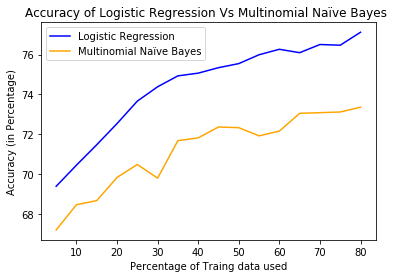

In [245]:
Percent_Training = Final['Fractions']
Accuracy_LG = Final['Accuracy_LG']
Accuracy_MNB = Final['Accuracy_MNB']

plt.plot(Percent_Training, Accuracy_LG, color='b',label='Logistic Regression')
plt.plot(Percent_Training, Accuracy_MNB, color='orange',label='Multinomial Naïve Bayes')
plt.xlabel('Percentage of Traing data used')
plt.ylabel('Accuracy (in Percentage)')
plt.title('Accuracy of Logistic Regression Vs Multinomial Naïve Bayes ')
plt.legend(loc='upper left')
plt.show()